In [88]:
import os, folium
import pandas as pd
import numpy as np
import fiona
from shapely.geometry import Point, mapping
from fiona import collection
import geopandas

In [89]:
import pandas as pd
import numpy as np
from pprint import pprint as pp
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
file = "/home/thistle/Desktop/lightning_nz.shp"
of = fiona.open(file, "r")
meta = of.meta

In [91]:
meta

{'driver': 'ESRI Shapefile',
 'schema': {'properties': OrderedDict([('month', 'int:18'),
               ('year', 'int:18')]),
  'geometry': 'Point'},
 'crs': {},
 'crs_wkt': ''}

In [92]:
print(meta.get("schema"))
of.close()
of.flush()

{'properties': OrderedDict([('month', 'int:18'), ('year', 'int:18')]), 'geometry': 'Point'}


In [93]:
od = meta.get("schema")['properties']

In [94]:
type(od)

collections.OrderedDict

In [95]:
od['month']

'int:18'

In [96]:
file = "/home/thistle/Desktop/lightning_nz.shp"
with fiona.open(file, "r") as fio:
    meta = fio.meta
    print(meta)

{'driver': 'ESRI Shapefile', 'schema': {'properties': OrderedDict([('month', 'int:18'), ('year', 'int:18')]), 'geometry': 'Point'}, 'crs': {}, 'crs_wkt': ''}


In [97]:
fiona.listlayers("/home/thistle/Desktop")

['lightning_nz']

In [98]:
c = fiona.open(file,"r")
print(type(c))
ic = iter(c)
#next(ic), next(ic)


<class 'fiona.collection.Collection'>


In [99]:
#len(list(c))

In [100]:
c.closed

False

In [101]:
c.meta

{'driver': 'ESRI Shapefile',
 'schema': {'properties': OrderedDict([('month', 'int:18'),
               ('year', 'int:18')]),
  'geometry': 'Point'},
 'crs': {},
 'crs_wkt': ''}

In [102]:
# c.schema['geometry']
c.profile

{'driver': 'ESRI Shapefile',
 'schema': {'properties': OrderedDict([('month', 'int:18'),
               ('year', 'int:18')]),
  'geometry': 'Point'},
 'crs': {},
 'crs_wkt': ''}

In [103]:
ic = iter(c)
rec = next(ic)

In [104]:
rec

{'type': 'Feature',
 'id': '0',
 'properties': OrderedDict([('month', 8), ('year', 2000)]),
 'geometry': {'type': 'Point', 'coordinates': (-35.5582, 177.275)}}

In [105]:
#
file1 = "/media/thistle/Passport/gis/nz/lightning/strikes.shp.dir/strikes.shp"
z = fiona.open(file1)

In [106]:
zi = iter(z)
rec2 = next(zi)

In [107]:
rec2

{'type': 'Feature',
 'id': '0',
 'properties': OrderedDict([('month', 8), ('year', 2000)]),
 'geometry': {'type': 'Point', 'coordinates': (177.275, -35.5582)}}

In [38]:
c.validate_record(rec)

True

In [39]:
rec.keys()

dict_keys(['type', 'id', 'properties', 'geometry'])

In [43]:
rec['properties'].items()

odict_items([('month', 8), ('year', 2000)])

In [44]:
fiona.FIELD_TYPES_MAP

{'int32': int,
 'float': float,
 'str': str,
 'date': fiona.rfc3339.FionaDateType,
 'time': fiona.rfc3339.FionaTimeType,
 'datetime': fiona.rfc3339.FionaDateTimeType,
 'bytes': bytes,
 'int64': int,
 'int': int}

In [56]:
fiona.prop_width('str:25')

25

In [59]:
print(rec)

{'type': 'Feature', 'id': '0', 'properties': OrderedDict([('month', 8), ('year', 2000)]), 'geometry': {'type': 'Point', 'coordinates': (-35.5582, 177.275)}}


In [60]:
pp(rec)

{'geometry': {'coordinates': (-35.5582, 177.275), 'type': 'Point'},
 'id': '0',
 'properties': OrderedDict([('month', 8), ('year', 2000)]),
 'type': 'Feature'}


In [67]:
coord = rec["geometry"].get("coordinates")

In [68]:
lat = coord[0]

In [71]:
pp(rec['geometry'])

{'coordinates': (-35.5582, 177.275), 'type': 'Point'}


<hr>

### Fiona’s x,y is always easting, northing, which means (long, lat). Longitude first and latitude second, consistent with the GeoJSON format specification.

<hr>

In [72]:
a = "fred"
b = 2
kw = {"a": a, "b": b}
pp(kw)

{'a': 'fred', 'b': 2}


In [73]:
def wierd(**kwargs):
    print(3*a)

In [75]:
wierd(**kw)

fredfredfred


In [77]:
%%time
file_in = "/media/thistle/Passport/gis/nz/lightning/mfe-lightning-strikes-20012016-CSV/lightning-strikes-20012016.csv"
dtypes = [("lat", "float"), ("lon", "float"), ("year", "int"), ("month","int8")]
df = pd.read_csv(file_in, dtype=dtypes)

CPU times: user 497 ms, sys: 24 ms, total: 521 ms
Wall time: 520 ms


In [78]:
%%time
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.lon, df.lat))
gdf.head()

CPU times: user 18 s, sys: 298 ms, total: 18.3 s
Wall time: 18.3 s


,lon,lat,year,month,geometry
0,177.2750,-35.5582,2000,8,POINT (177.27500 -35.55820)
1,177.0922,-35.5696,2000,8,POINT (177.09220 -35.56960)
2,177.9768,-33.7629,2000,8,POINT (177.97680 -33.76290)
3,177.3294,-33.9202,2000,8,POINT (177.32940 -33.92020)
4,177.1735,-35.9420,2000,8,POINT (177.17350 -35.94200)


In [79]:
low_res = geopandas.datasets.get_path("naturalearth_lowres")
world = geopandas.read_file(low_res)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


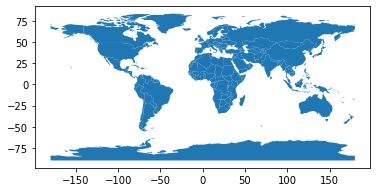

In [80]:
world.plot()

In [81]:
world.geometry.name

'geometry'

In [83]:
3 * 3

9

In [84]:
%%time
file = "/home/thistle/Desktop/lightning_nz.shp"
gdf2 = geopandas.read_file(file)

CPU times: user 46.9 s, sys: 844 ms, total: 47.8 s
Wall time: 47.7 s


In [86]:
gdf2.head()

,month,year,geometry
0,8,2000,POINT (-35.558 177.275)
1,8,2000,POINT (-35.570 177.092)
2,8,2000,POINT (-33.763 177.977)
3,8,2000,POINT (-33.920 177.329)
4,8,2000,POINT (-35.942 177.173)


In [21]:
c.close()